# Model Building on Algerian Forest Fires Dataset 

# Logistic Regression and SVM Algorithms Implementation

**Life cycle of Machine learning Project (Pipeline)**

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and notFire

# Data Set Information

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the 
 northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- The period from June 2012 to September 2012.
- The dataset includes 13 columns and 244 rows 
- The 244 instances have been classified into fire (138 classes) and notfire(106 classes) classes.
- Source: https://drive.google.com/file/d/1Qr7FQJR6nULyTwCzbx3S6nHdCQf62uLr/view?usp=share_link

# Problem statement

- This dataset comprises features of forest fire which will lead to two classes fire and not fire in Bejaia region and Sidi Bel-abbes region of Algeria.
- User can predict the fire will occur or not based on input features.
- Target feature will be clases(fire / Not fire)
- independent feature will be all the features except Classes.

# Task:

**Perform Logistic Regression when:**
- When dataset is balanced build model with 90% accuracy.
- if dataset is imbalanced create a model by choosing Precision, Recall, F1-Beta score without handling imbalance dataset   

**Importing Liberaries**

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**importing cleanned Dataset**

In [119]:
df = pd.read_csv('Algerian double-Cleanned dataset.csv')

In [120]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,0,0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,1,1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,2,2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,3,3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,Bejaia,2012-06-04
4,4,4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


**Here in Classes column-**
- Not fire: 0 
- Fire : 1

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  244 non-null    int64  
 1   Unnamed: 0    244 non-null    int64  
 2   Temperature   244 non-null    int64  
 3   RH            244 non-null    int64  
 4   Ws            244 non-null    float64
 5   Rain          244 non-null    float64
 6   FFMC          244 non-null    float64
 7   DMC           244 non-null    float64
 8   ISI           244 non-null    float64
 9   BUI           244 non-null    float64
 10  FWI           244 non-null    float64
 11  Classes       244 non-null    float64
 12  Region        244 non-null    object 
 13  Date          244 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 26.8+ KB


In [122]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

**Replacing the values of 'Region' feature with:**
- 0 : 'Bejaia'
- 1 : 'Sidi-Bel Abbes'

In [123]:
df['Region'].unique()

array(['Bejaia', 'Sidi Bel-abbes'], dtype=object)

In [133]:
df['Region'] = df['Region'].replace('Bejaia',0)
df['Region'] = df['Region'].replace('Sidi-Bel Abbes',1)

In [134]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


In [136]:
df['Region']=df['Region'].astype(str).astype(int)
#df['Region'] = pd.to_numeric(df['Region'])

ValueError: invalid literal for int() with base 10: 'Sidi Bel-abbes'

In [127]:
df['Region'].dtype

dtype('O')

In [128]:
#now all features are converted into numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    float64
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   ISI          244 non-null    float64
 7   BUI          244 non-null    float64
 8   FWI          244 non-null    float64
 9   Classes      244 non-null    float64
 10  Region       244 non-null    object 
 11  Date         244 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 23.0+ KB


In [85]:
df.shape

(244, 12)

# Statistical Representation

In [86]:
df.describe(include='all')

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,122
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2012-06-01
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,2
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,7.02377,0.565574,NaN,NaN
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,7.42746,0.496700,NaN,NaN
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.00000,0.000000,NaN,NaN
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.70000,0.000000,NaN,NaN
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,4.20000,1.000000,NaN,NaN
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,11.37500,1.000000,NaN,NaN


**Observation**
- no missing value is present in the dataset.

In [90]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,9.218043,23.512265,15.177785,0.935168
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-42.920524,-73.700941,-63.542154,-3.216117
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,0.178913,1.187799,0.645170,-0.092862
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-2.897687,-8.496825,-4.809061,-0.376833
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,44.283138,120.090018,73.359635,5.484349
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,34.831449,172.536341,80.452858,3.588791
ISI,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,17.433281,37.714477,28.319011,1.525363
BUI,23.512265,-73.700941,1.187799,-8.496825,120.090018,172.536341,37.714477,201.777024,90.530800,4.119605
FWI,15.177785,-63.542154,0.645170,-4.809061,73.359635,80.452858,28.319011,90.530800,55.167169,2.643291
Classes,0.935168,-3.216117,-0.092862,-0.376833,5.484349,3.588791,1.525363,4.119605,2.643291,0.246711


In [87]:
#create a copy
df1= df.copy()

In [89]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


# Graphical Representation of Features

ValueError: could not convert string to float: 'Sidi Bel-abbes'

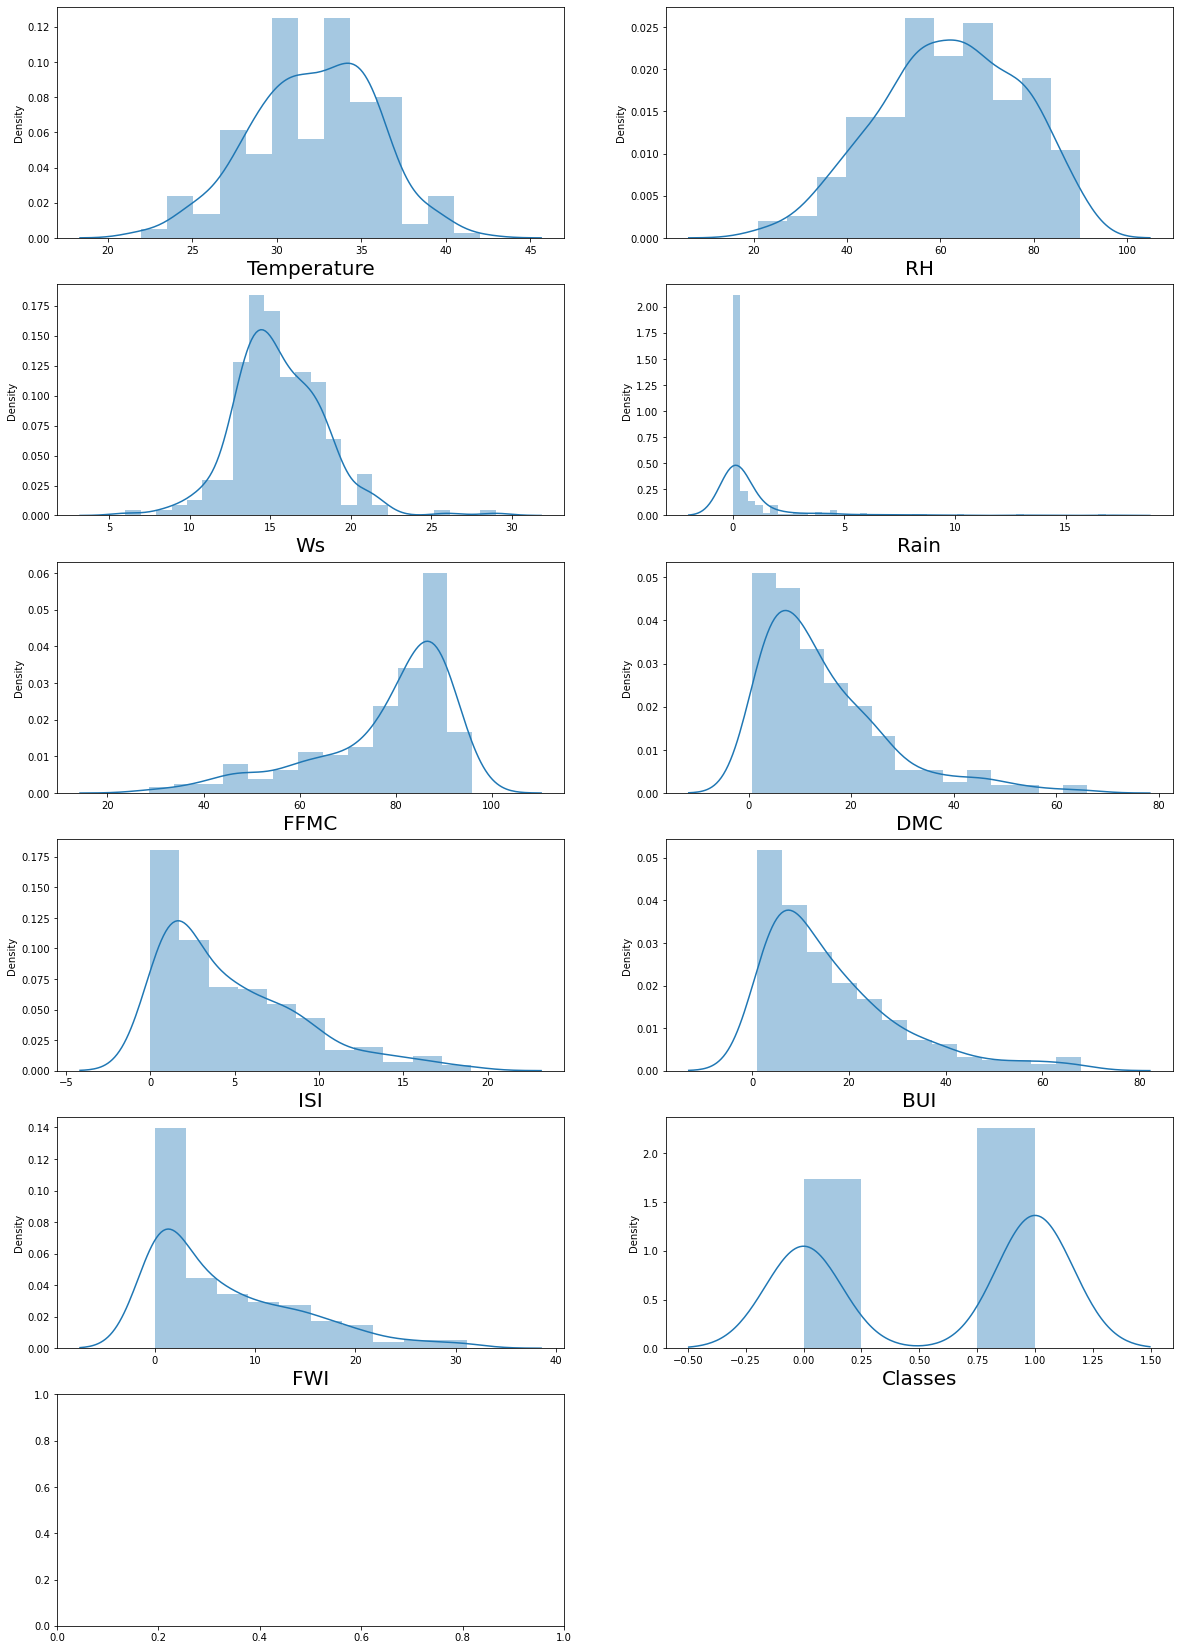

In [91]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

**Observations**
- Rain, DMC, DC, FWI,ISI,BUI are rightly skewed(log normal distribution)

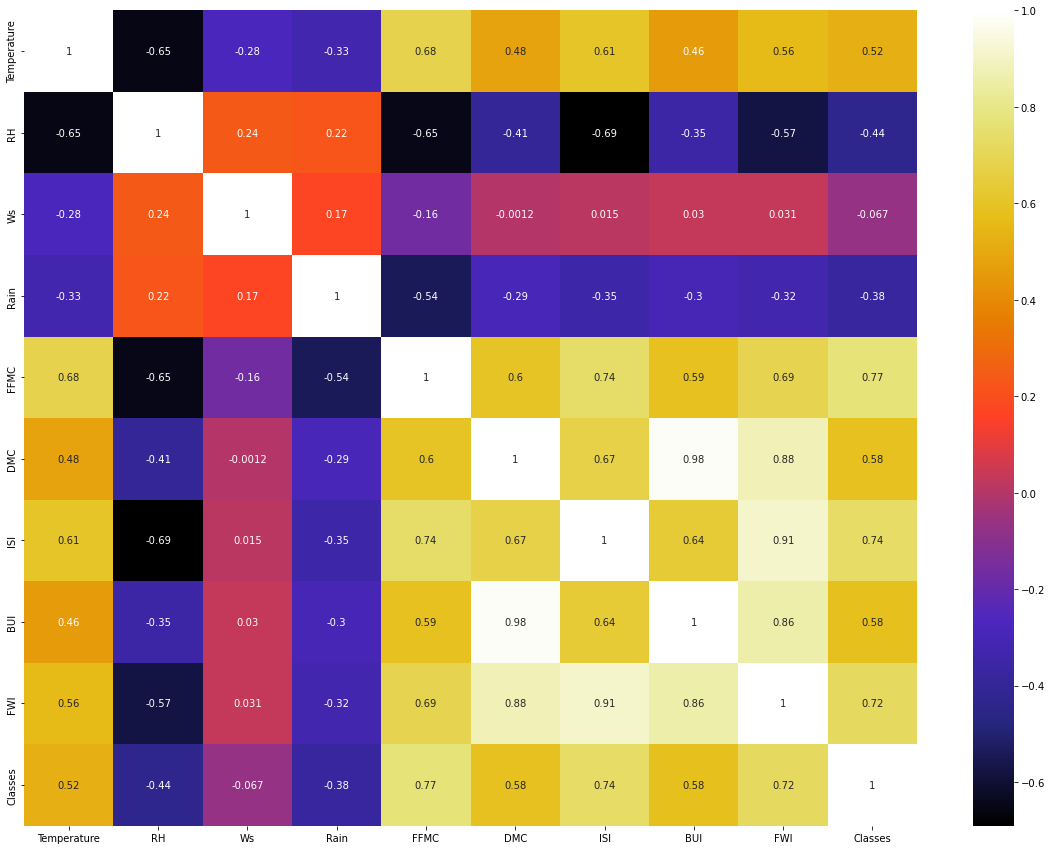

In [93]:
#Heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),cmap="CMRmap", annot=True);

**Target feature: Classes**

In [96]:
df['Classes'].value_counts()

1.0    138
0.0    106
Name: Classes, dtype: int64

**Here in Classes column-**
- Not fire: 0 
- Fire : 1


<AxesSubplot:xlabel='Region', ylabel='Classes'>

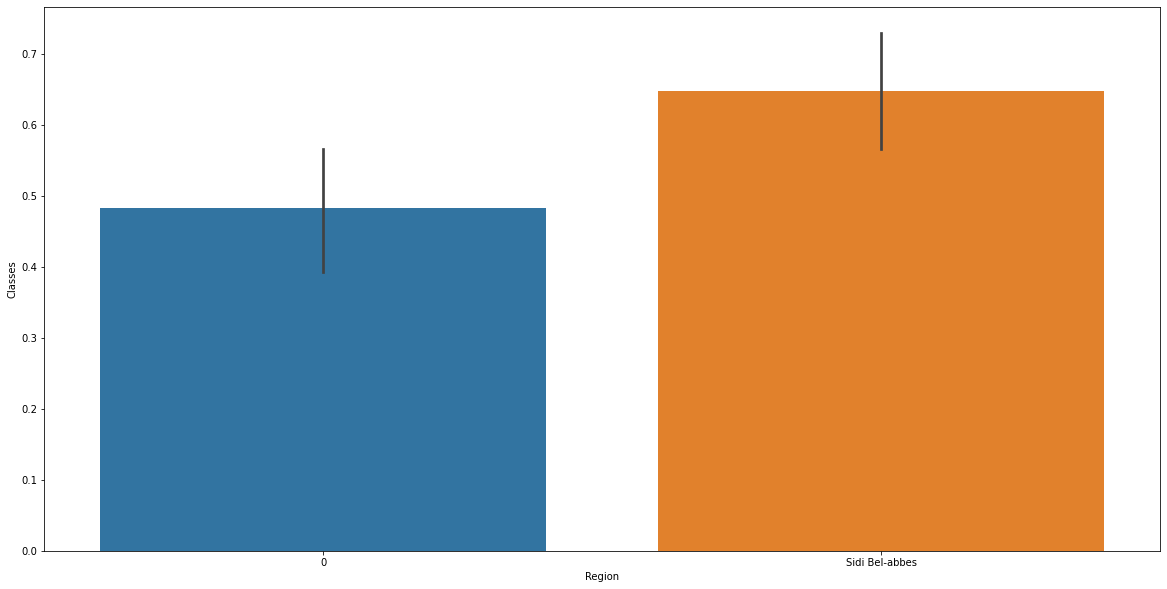

In [97]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Classes",data=df1)

In [104]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


# Model Building

# Creating Independent and Dependent Features

In [106]:
x = df1.drop(['Classes', 'Date'], axis=1)
y = df1['Classes']

In [107]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0


In [108]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

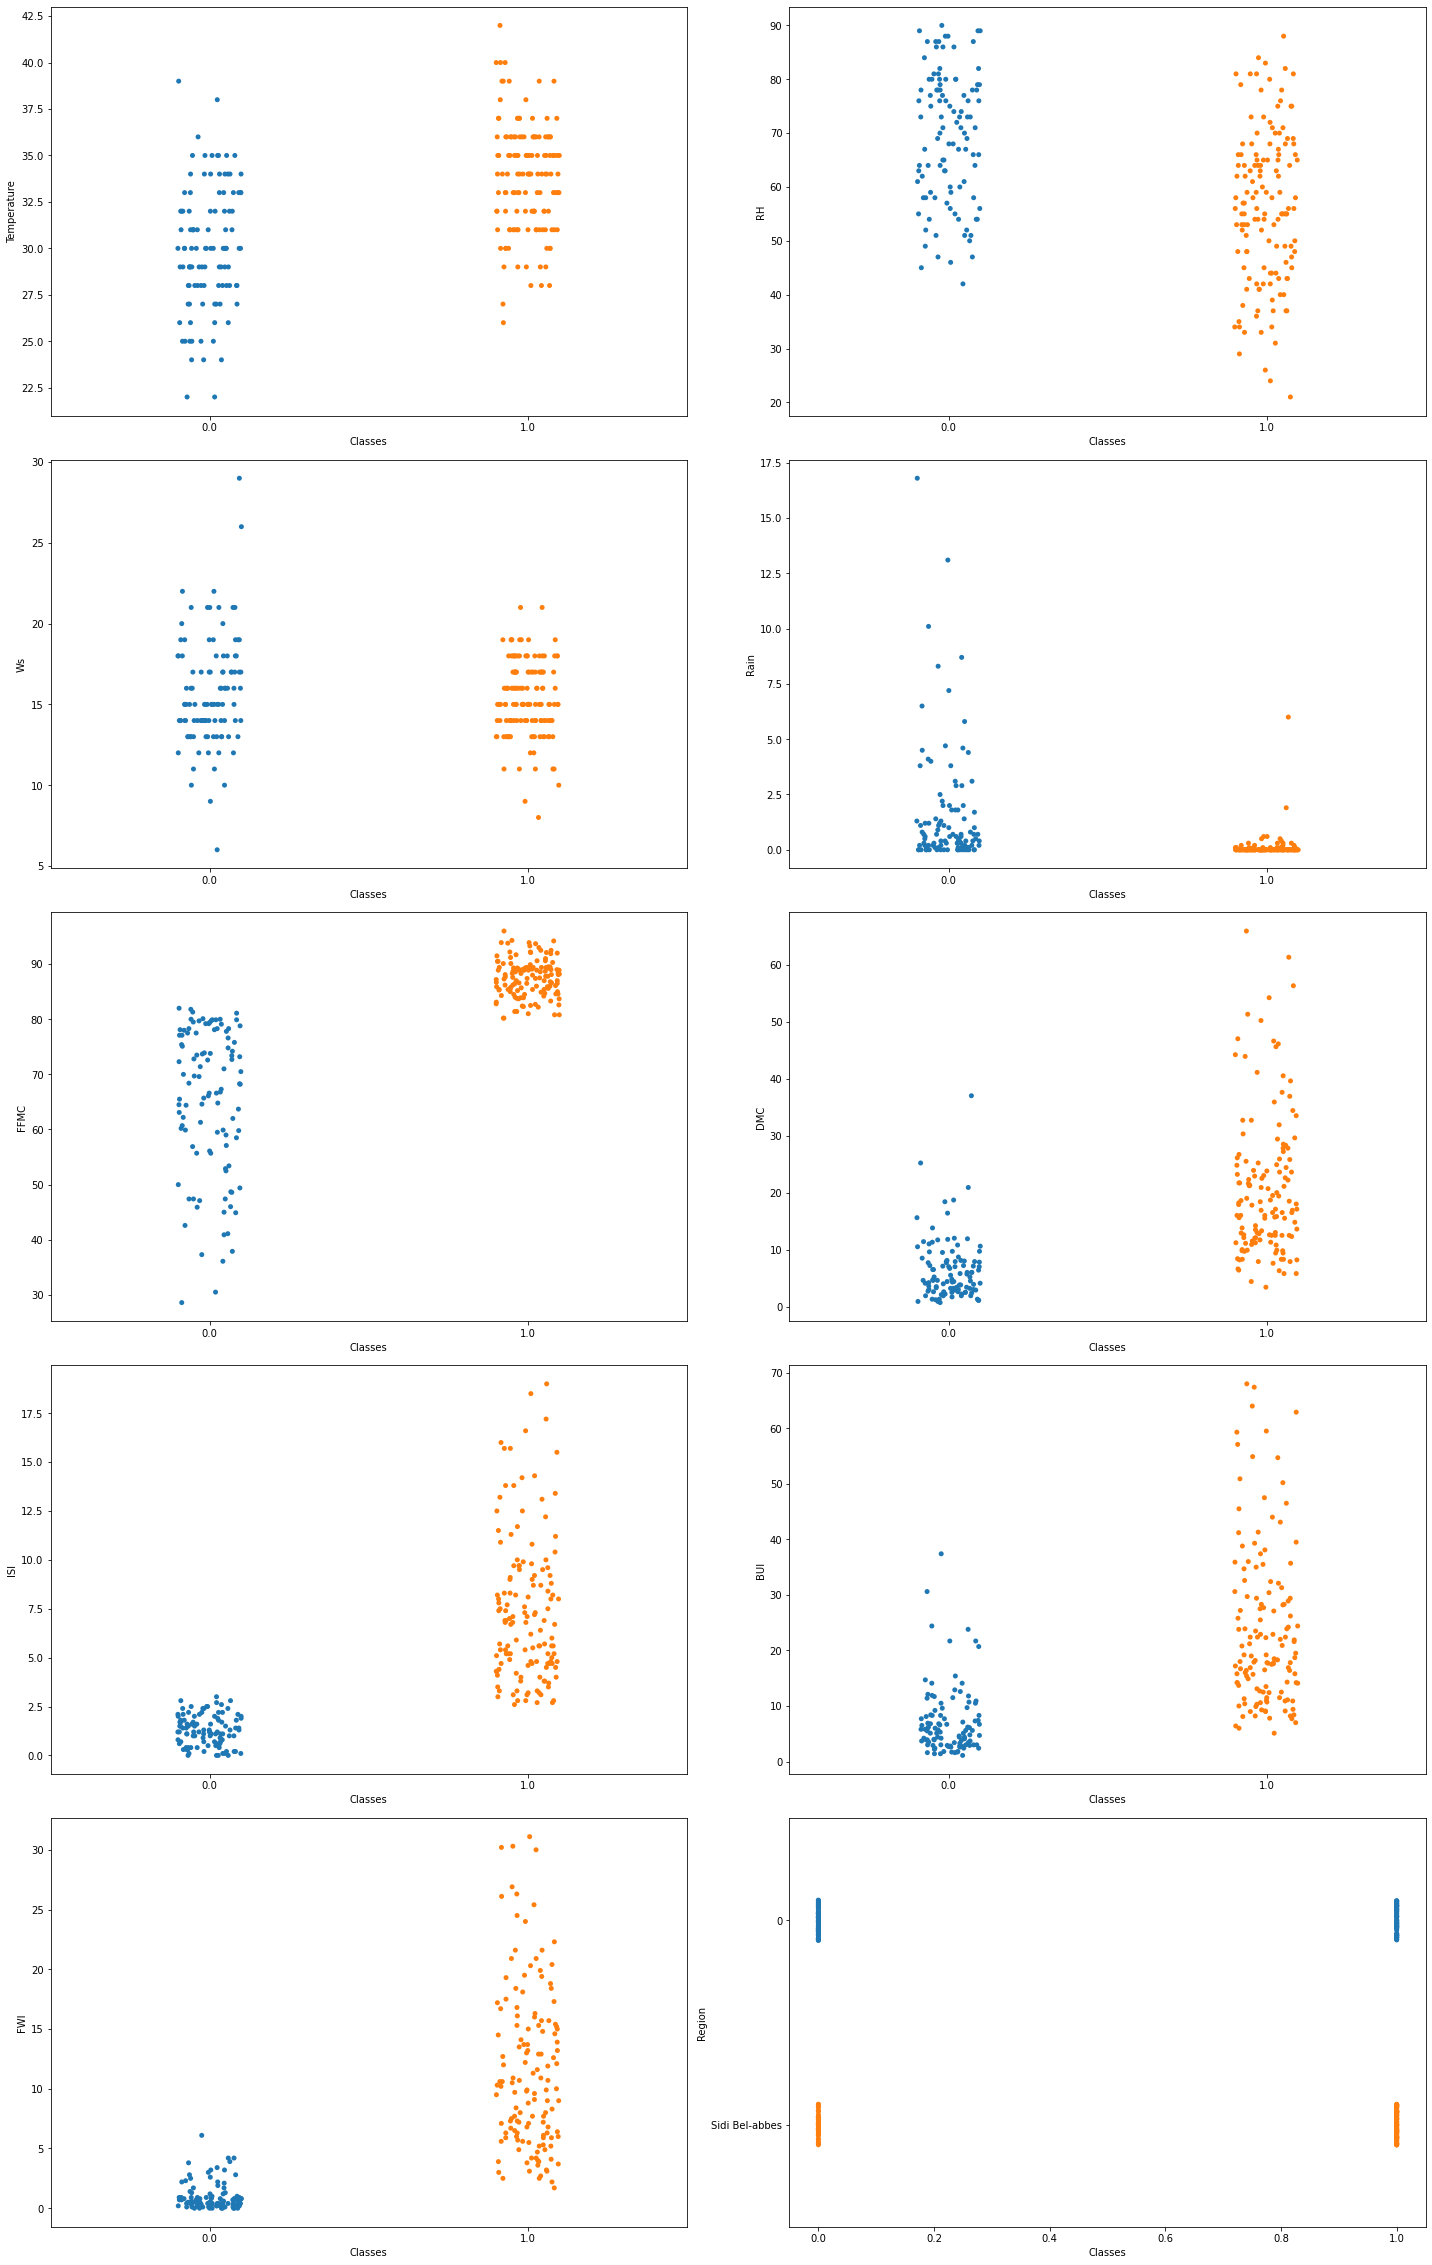

In [110]:
# Visualizing the relationship between our independent and dependent Features
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

# Importing sklearn liberaries

In [111]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Feature Scaling or standardize the dataset

In [116]:
scaler = StandardScaler()
scaler

StandardScaler()

In [117]:
#Apply scaler on train and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

ValueError: could not convert string to float: 'Sidi Bel-abbes'

# Train and Test split

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Logistic Regression Model

In [115]:
lg_regression = LogisticRegression()
lg_regression

LogisticRegression()